# Statistical Data Analysis <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library" data-toc-modified-id="Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Time-series-analysis-of-loan-amount" data-toc-modified-id="Time-series-analysis-of-loan-amount-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time-series analysis of loan amount</a></span><ul class="toc-item"><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decomposition</a></span></li></ul></li><li><span><a href="#Investment-return-for-each-loan" data-toc-modified-id="Investment-return-for-each-loan-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Investment return for each loan</a></span><ul class="toc-item"><li><span><a href="#Normality-test" data-toc-modified-id="Normality-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normality test</a></span><ul class="toc-item"><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#QQ-plot" data-toc-modified-id="QQ-plot-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>QQ plot</a></span></li></ul></li><li><span><a href="#Default-vs-return" data-toc-modified-id="Default-vs-return-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Default vs return</a></span><ul class="toc-item"><li><span><a href="#Bootstrapping-Hypothesis-Test" data-toc-modified-id="Bootstrapping-Hypothesis-Test-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Bootstrapping Hypothesis Test</a></span></li></ul></li></ul></li><li><span><a href="#Income-vs-default" data-toc-modified-id="Income-vs-default-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Income vs default</a></span></li><li><span><a href="#Purpose-of-loan-vs-interest-rate" data-toc-modified-id="Purpose-of-loan-vs-interest-rate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Purpose of loan vs interest rate</a></span></li><li><span><a href="#Purpose-of-loan-vs-default" data-toc-modified-id="Purpose-of-loan-vs-default-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Purpose of loan vs default</a></span></li></ul></div>

## Library 

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

from IPython import get_ipython
ipython = get_ipython()

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, norm

from numpy.random import seed, randn
import pymc3 as pm
import theano
from theano import tensor as T
from pymc3.math import switch
from ipywidgets import widgets
import math as math
import itertools

### Import data

In [20]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'data_eda.csv', low_memory=False, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] )
end = time.time()
print('It takes  ' + str(round((end-start)/60, 1)) +' min to read the data')

It takes  10.8 min to read the data


In [21]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,loan_status,home_ownership,sub_grade,debt_settlement_flag,grade,application_type,purpose,initial_list_status,hardship_flag,title,emp_length,pymnt_plan,verification_status,addr_state,term,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_period,target,term_num,return_1,return_2,return_3,region,fico,emp_length_num
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224583,2013-12-01,2001-06-01,2016-02-01,2018-06-01,14.98,66.2,Fully Paid,MORTGAGE,C3,N,C,Individual,other,f,N,Other,10+ years,n,Not Verified,NY,36 months,11100.0,11100.0,11100.0,14.98,...,8.0,11.0,8.0,9.0,0.0,0.0,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0,26.021068,0,36,0.102854,0.074344,0.102854,northeast,692.0,10.0
10148122,2013-12-01,2003-09-01,2016-06-01,2020-01-01,7.62,55.7,Fully Paid,MORTGAGE,A3,N,A,Individual,debt_consolidation,f,N,Debt Consolidation and Credit Transfer,3 years,n,Not Verified,TX,36 months,12000.0,12000.0,12000.0,7.62,...,8.0,14.0,5.0,17.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0,29.996509,0,36,0.046590,0.038821,0.046590,south,707.0,3.0
10149342,2013-12-01,1986-10-01,2016-07-01,2018-03-01,10.99,61.2,Fully Paid,OWN,B2,N,B,Individual,debt_consolidation,w,N,Debt Consolidation,10+ years,n,Verified,MI,36 months,27050.0,27050.0,27050.0,10.99,...,10.0,15.0,4.0,14.0,0.0,0.0,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0,30.982156,0,36,0.067334,0.057949,0.067334,midwest,732.0,10.0
10129454,2013-12-01,2009-12-01,2016-04-01,2018-08-01,10.99,24.0,Fully Paid,RENT,B2,N,B,Individual,debt_consolidation,f,N,No Regrets,4 years,n,Not Verified,NC,36 months,12000.0,12000.0,12000.0,10.99,...,15.0,18.0,7.0,15.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0,27.992361,0,36,0.071041,0.055239,0.071041,south,722.0,4.0
10149488,2013-12-01,1995-08-01,2014-09-01,2017-01-01,10.99,16.1,Fully Paid,MORTGAGE,B2,N,B,Individual,home_improvement,w,N,For The House,2 years,n,Source Verified,TX,36 months,4800.0,4800.0,4800.0,10.99,...,3.0,7.0,2.0,3.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,25700.0,4136.0,25700.0,0.0,9.002238,0,36,0.099286,0.024828,0.099286,south,757.0,2.0


## Time-series analysis of loan amount 

Look at the time series data for average loan amount requested over time. 

There are different components to a time-series data:
1. Trend: Increasing or decreasing value
2. Seasonality: Repeated cycles
3. Noise: Random variation

In [22]:
df_loan_amnt = df.groupby('issue_d')['loan_amnt'].mean().to_frame()


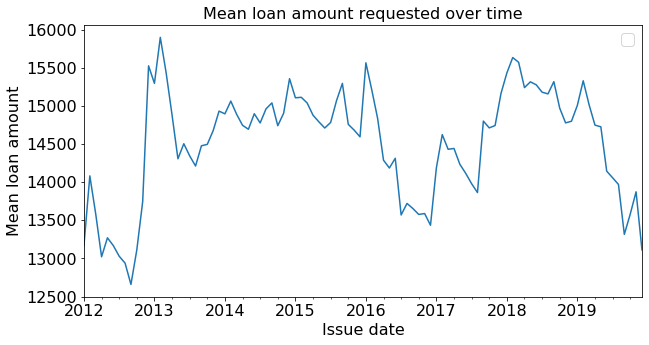

In [23]:
df_loan_amnt.plot(figsize=(10,5))
plt.rcParams.update({'font.size': 16})
plt.ylabel('Mean loan amount', fontsize=16)
plt.xlabel('Issue date', fontsize=16)
plt.title('Mean loan amount requested over time', fontsize=16)
plt.legend('')
plt.show()

### Stationarity
A stationary time series is a time series in which the statistic properties remain constant over time.
We should expect to see no trend or seasonality in a stationary time series. 

Hypothesis test by **Augmented Dickey-Fuller test**

 - Ho: The time series is not stationary (has time-dependent structure)
 - H1 : The time series is stationary (does not have time-dependent structure)

In [24]:
# Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
X = df_loan_amnt['loan_amnt'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.677392
p-value: 0.078033
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


- alpha =0.05
- p value > 0.05. We can not reject null hypothesis, so **time-series data is not stationary**.

### Decomposition
Since the time-series data is not stationary, we can expect it contains seasonal info. We can decompose a time series into the three different components: trend, seasonality, and stationary noise.


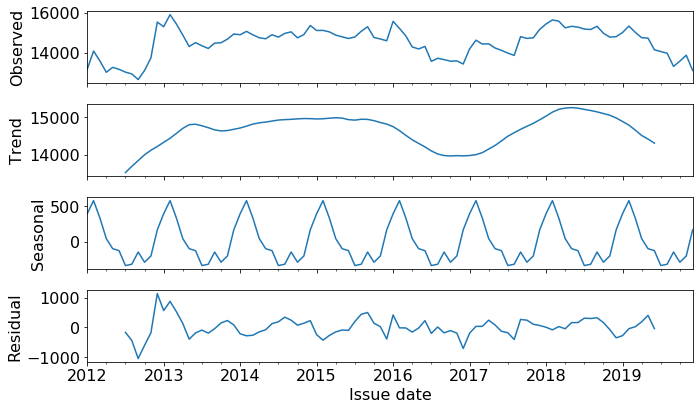

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

result = seasonal_decompose(df_loan_amnt,  model='additive')
result.plot()
plt.xlabel('Issue date')
plt.show()

From the trend plot, we can see there is mean loan amount has a clear drop between 2016 and 2017. The seasonal frequency is about 1 year.

## Investment return for each loan

Next, we calculate the annual loan investiment return $r$ based on the following assumption:
$$
Gain = \frac{p_1-p_0}{p_0}\times \frac{12}{t},    (p_1>p_0)
$$
$$
Loss = \frac{p_1-p_0}{p_0}\times \frac{12}{m},    (p_1<p_0)
$$

$p_1$ is the total amount of loan received (total payment)

$p_0$ is the total amount committed to that loan at that point in time (funded amount)
    
$t$ is the loan period in month (loan period) - the actual number of months from the date of loan was issued to the date the last payment was made.

$m$ is the loan term (36 month or 60 month)

* this simple model does not consider reinvestiment.

In [25]:
df['Annual_ROI'].describe()

count    1.661976e+06
mean     5.311365e-02
std      1.038133e-01
min     -3.330833e-01
25%      4.193759e-02
50%      7.362982e-02
75%      1.095695e-01
max      1.675665e+00
Name: return_3, dtype: float64

In [16]:
def remove_outlier_IQR(data):
    '''
    remove outliner (above/below 1.5*IQR)
    input: original dataframe, column name
    output: new dataframe (without outliner)
    '''
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return (data[(data > lower_bound) & (data < upper_bound)])

Statistical analysis to see the ratio of negative vs postive return 

In [36]:
print('negative return (loss): ', round(len(df['Annual_ROI'][df['Annual_ROI']<0])/len(df['Annual_ROI']),2))
print('posive return (gain):', round(len(df['Annual_ROI'][df['Annual_ROI']>0])/len(df['Annual_ROI']),2))
print('----------')
print('maximal gain (default):', np.max(df[df['target']==1]['Annual_ROI']))
print('maximal loss (default):', np.min(df[df['target']==1]['Annual_ROI']))
print('----------')
print('maximal gain (fully paid):', np.max(df[df['target']==0]['Annual_ROI']))
print('maximal loss (fully paid):', np.min(df[df['target']==0]['Annual_ROI']))

negative return (loss):  0.18
posive return (gain): 0.82
----------
maximal gain (default): 1.6756650661764698
maximal loss (default): -0.3330833333333333
----------
maximal gain (fully paid): 0.7375953689650211
maximal loss (fully paid): 0.0


Based on this simple model, 
- **82% of investiment in LC data has postive return**.  
- The maximal loss is 1.68x
- The maximal gain of default loan is 1.67x, which is about two times higher than the maxmal gain of fully paid loan


Take a look at the distribution of return

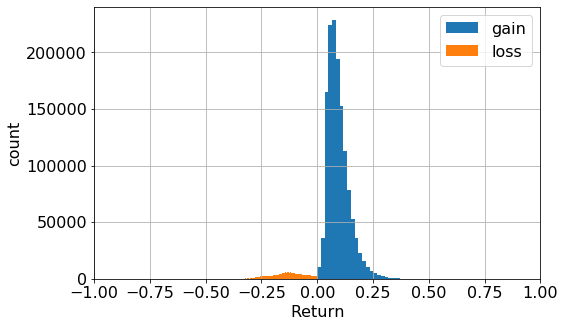

In [31]:
# histogram of return
plt.figure(figsize=(8,5))
ax = df[df['Annual_ROI']>0]['Annual_ROI'].hist(bins=100, label='gain')
df[df['Annual_ROI']<0]['Annual_ROI'].hist(bins=100, label='loss', ax=ax)
plt.xlim([-1,1])
plt.legend()
plt.xlabel('Annual_ROI')
plt.ylabel('count')
plt.show()

- The postive return and negative return have different distribution.
- The distribution is stewed, so I apply log transform on the data, and remove the outliers.

In [39]:
log_return_pos = np.log(df[df['return_3']>0]['return_3'])
log_return_pos_rm = remove_outlier_IQR(log_return_pos)

log_return_neg = np.log(-df[df['return_3']<0]['return_3'])
log_return_neg_rm = remove_outlier_IQR(log_return_neg)

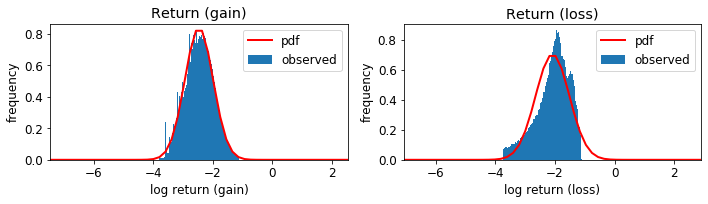

In [42]:
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 12})

plt.subplot(121)

log_return_pos_rm.hist(bins=100, normed=True, label='observed')
plt.xlim([log_return_pos_rm.mean()-5,log_return_pos_rm.mean()+5])
plt.grid(False)
plt.xlabel('log return (gain)')
plt.ylabel('frequency')
x1 = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x1, stats.norm.pdf(x1, log_return_pos_rm.mean(),log_return_pos_rm.std()), \
         'r', lw=2.0, label='pdf')
plt.legend()
plt.title('Return (gain)')


plt.subplot(122)

log_return_neg_rm.hist(bins=100, normed=True, label='observed')
plt.xlim([log_return_neg_rm.mean()-5, log_return_neg_rm.mean()+5])

plt.grid(False)
plt.xlabel('log return (loss)')
plt.ylabel('frequency')
x2 = np.linspace(plt.axis()[0], plt.axis()[1])

plt.plot(x2, stats.norm.pdf(x2, log_return_neg_rm.mean(),log_return_neg_rm.std()),\
        'r', lw=2.0, label='pdf')
plt.legend()
plt.title('Return (loss)')

plt.tight_layout()

In [43]:
print(log_return_pos_rm.mean())
print(log_return_pos_rm.std())
print(log_return_neg_rm.mean())
print(log_return_neg_rm.std())

-2.4656255765747375
0.4761771882952374
-2.0841037582341095
0.5674537826343188


### Normality test
Check the normality by Shapiro-Wilk test and QQ plot.
#### Shapiro-Wilk Test

    -  Ho: Sample is Gaussian
    -  H1: Sample is not Gaussian


In [44]:
# Shapiro-Wilk Test

def Shapiro_Wilk(data):
    # seed the random number generator
    seed(1)
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [45]:
# postive return
Shapiro_Wilk(log_return_pos_rm)

Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
# negative return
Shapiro_Wilk(log_return_neg_rm)

Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)


**Both log return for gain and loss are not normal distribution**

#### QQ plot

Text(0.5, 1.0, 'Return (loss)')

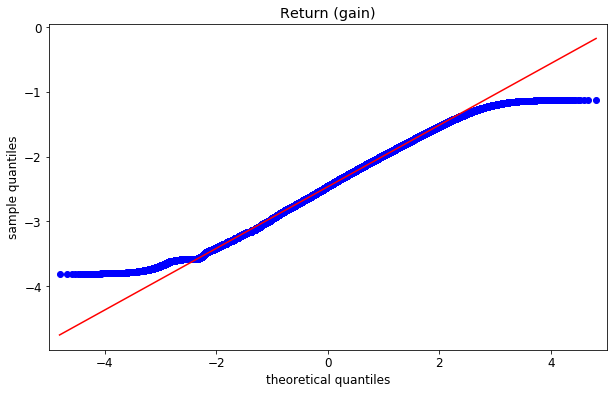

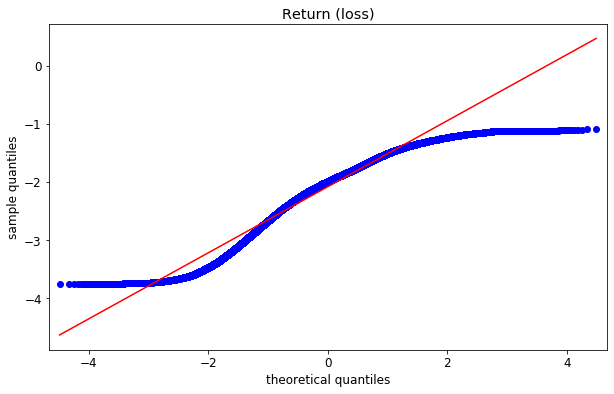

In [47]:
sm.qqplot(log_return_pos_rm, line='s')
plt.grid(False)
plt.rcParams.update({'font.size': 12})
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Return (gain)')

sm.qqplot(log_return_neg_rm, line='s')
plt.grid(False)
plt.rcParams.update({'font.size': 12})
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Return (loss)')

qq plot shows linear in the center region, but flat on the edge. It suggests the return is not normal distribution.

### Default vs return
It would be interesting to see how default related to return. We can explect that the investors whose loans are not default get postive return. But the question is can default loan has any postive return? 

In [49]:
# quick calculation for return in default and payoff loan. 
print('default & gain =', len(df.query('target == 1 & return_3 >0'))/len(df.query('target == 1')))      
print('default & loss =', len(df.query('target == 1 & return_3 <0'))/len(df.query('target == 1')))

print('payoff & gain =', len(df.query('target == 0 & return_3 >0'))/len(df.query('target == 0')))
print('payoff & loss =', len(df.query('target == 0 & return_3 <0'))/len(df.query('target == 0')))


default & gain = 0.08479159164291339
default & loss = 0.9152053565433937
payoff & gain = 0.9999812636119859
payoff & loss = 0.0


So indeed, all the good loan (no default) has postive return. But there are 8% of default loan has postive return.

In [50]:
df_default_pos = df.query('target == 1 & return_3 >0')#['return']
df_payoff_pos = df.query('target == 0 & return_3 >0')#['return']

In [51]:
display(df_default_pos['return_3'].describe())
display(df_payoff_pos['return_3'].describe())

count    27784.000000
mean         0.044341
std          0.050776
min          0.000003
25%          0.016406
50%          0.035033
75%          0.059507
max          1.675665
Name: return_3, dtype: float64

count    1.334277e+06
mean     9.576593e-02
std      4.803351e-02
min      3.740323e-07
25%      6.171336e-02
50%      8.593315e-02
75%      1.193453e-01
max      7.375954e-01
Name: return_3, dtype: float64

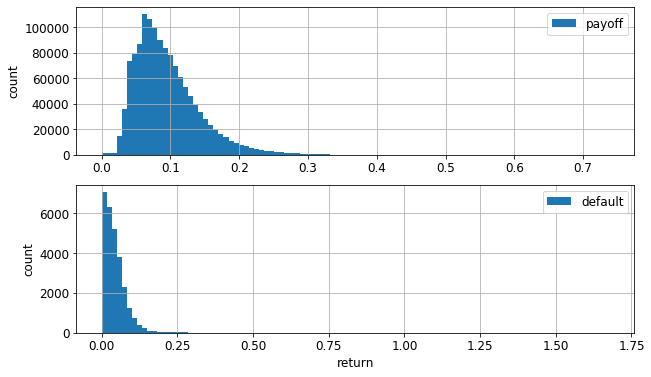

In [52]:
plt.subplot(211)
df_payoff_pos['return_3'].hist(bins=100, label='payoff')
plt.legend()
plt.ylabel('count')
plt.subplot(212)
df_default_pos['return_3'].hist(bins=100, label='default')
plt.ylabel('count')
plt.xlabel('return')
plt.legend()
plt.show()

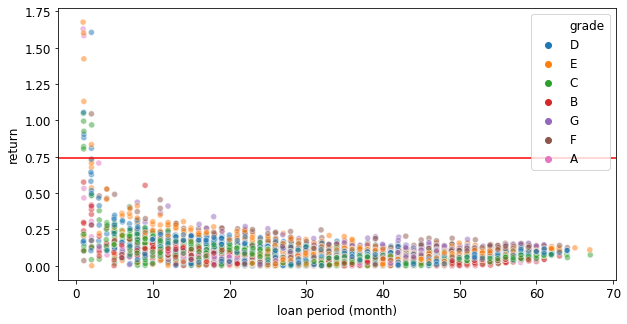

In [64]:
#plt.scatter(df_default_pos['loan_period'], df_default_pos['return_'])
plt.figure(figsize=(10,5))
sns.scatterplot(x='loan_period', y='return_3', hue='grade', alpha=0.5, data=df_default_pos)
plt.xlabel('loan period (month)')
plt.axhline(np.max(df[df['target']==0]['return_3']), color='r', linestyle='-')
plt.ylabel('return')
#plt.xlim([0,5])
plt.show()

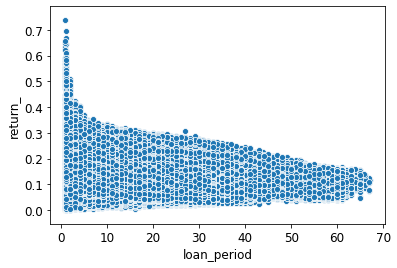

In [309]:
sns.scatterplot(x='loan_period', y='return_', data=df_payoff_pos)

In [69]:
# pull out high risk loan
df_risk = df[df['return_3']>0.7375953689650211]

In [67]:
len(df_risk)

19

In [68]:
df_risk

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,loan_status,home_ownership,sub_grade,debt_settlement_flag,grade,application_type,purpose,initial_list_status,hardship_flag,title,emp_length,pymnt_plan,verification_status,addr_state,term,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_period,target,term_num,return_1,return_2,return_3,region,fico,emp_length_num
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9845644,2013-12-01,2000-03-01,2014-02-01,2020-01-01,14.98,20.4,Charged Off,MORTGAGE,C3,N,C,Individual,debt_consolidation,f,N,debt consolidation,10+ years,n,Verified,CA,36 months,7350.0,7350.0,7350.000000,14.98,...,11.0,23.0,4.0,12.0,0.0,0.0,0.0,1.0,88.5,0.0,0.0,0.0,201258.0,3004.0,3200.0,0.0,2.037003,1,36,0.968578,0.054805,0.968578,west,692.0,10.0
1469058,2012-08-01,1994-01-01,2012-10-01,2016-10-01,23.63,76.6,Charged Off,RENT,F3,N,F,Individual,debt_consolidation,f,N,Loan,4 years,n,Verified,NJ,60 months,30000.0,30000.0,29995.530649,23.63,...,4.0,8.0,4.0,4.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,72000.0,55174.0,72000.0,0.0,2.004148,1,60,1.044618,0.034893,1.044618,northeast,682.0,4.0
1334517,2012-06-01,2009-05-01,2012-08-01,2020-01-01,17.99,48.5,Charged Off,RENT,D2,N,D,Individual,medical,f,N,Personal,2 years,n,Source Verified,NY,36 months,3000.0,3000.0,3000.000000,17.99,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,NaN,42120.0,500.0,NaN,2.004148,1,36,0.808144,0.044990,0.808144,northeast,672.0,2.0
35004113,2014-11-01,2010-06-01,2015-01-01,2020-01-01,15.99,40.2,Charged Off,RENT,D2,N,D,Individual,debt_consolidation,w,N,Debt consolidation,4 years,n,Verified,FL,60 months,14400.0,14400.0,14400.000000,15.99,...,2.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,35887.0,28662.0,7200.0,28687.0,2.004148,1,60,1.605075,0.053613,1.605075,south,712.0,4.0
16191449,2014-05-01,1994-10-01,2014-06-01,2020-01-01,19.52,19.2,Charged Off,MORTGAGE,E2,N,E,Individual,debt_consolidation,w,N,Debt consolidation,1 year,n,Not Verified,IN,36 months,4550.0,4550.0,4550.000000,19.52,...,7.0,16.0,7.0,18.0,0.0,0.0,0.0,4.0,100.0,25.0,1.0,0.0,92750.0,60851.0,26400.0,54850.0,1.018501,1,36,1.130115,0.031973,1.130115,midwest,667.0,1.0
15310294,2014-05-01,1999-09-01,2014-06-01,2020-01-01,18.25,54.3,Charged Off,MORTGAGE,D3,N,D,Individual,house,w,N,Home buying,7 years,n,Source Verified,VA,36 months,3475.0,3475.0,3475.000000,18.25,...,5.0,17.0,3.0,6.0,0.0,0.0,0.0,3.0,94.4,0.0,1.0,0.0,75821.0,45704.0,3000.0,69021.0,1.018501,1,36,0.880820,0.024920,0.880820,south,667.0,7.0
12987029,2014-03-01,1999-05-01,2014-04-01,2020-01-01,18.25,2.8,Charged Off,RENT,D3,N,D,Individual,debt_consolidation,f,N,Debt consolidation,5 years,n,Source Verified,IL,60 months,18000.0,18000.0,18000.000000,18.25,...,6.0,11.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,2.0,42374.0,3172.0,18200.0,22991.0,1.018501,1,60,0.903563,0.015338,0.903563,midwest,672.0,5.0
60346723,2015-09-01,2004-12-01,2015-10-01,2020-01-01,13.33,102.4,Charged Off,MORTGAGE,C3,N,C,Individual,credit_card,f,N,Credit card refinancing,10+ years,n,Verified,TX,36 months,12000.0,12000.0,12000.000000,13.33,...,2.0,9.0,2.0,3.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,41396.0,39901.0,10500.0,30896.0,0.985647,1,36,0.819249,0.022430,0.819249,south,672.0,10.0
40776754,2015-02-01,1986-06-01,2015-03-01,2020-01-01,7.89,59.7,Charged Off,RENT,A5,N,A,Individual,debt_consolidation,w,N,Debt consolidation,3 years,n,Verified,CA,36 months,4800.0,4800.0,4800.000000,7.89,...,2.0,5.0,2.0,6.0,0.0,0.0,0.0,1.0,90.0,0.0,0.0,0.0,64081.0,56356.0,8300.0,55781.0,0.919937,1,36,1.628427,0.041613,1.628427,west,717.0,3.0


In [71]:
df_default_pos_60 = df_default_pos.query('term == " 60 months"')['return_3']
df_default_pos_36 = df_default_pos.query('term == " 36 months"')['return_3']

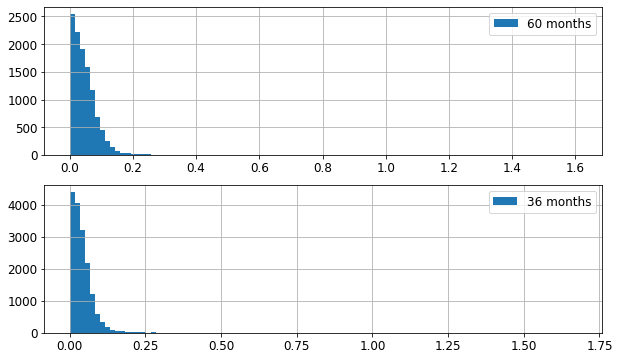

In [72]:
plt.subplot(211)
df_default_pos_60.hist(bins=100, label='60 months')
plt.legend()
#plt.xlim([0,0.2])
plt.subplot(212)
df_default_pos_36.hist(bins=100, label='36 months')
plt.legend()
#plt.xlim(0,0.2)

#### Bootstrapping Hypothesis Test


In [73]:
def Bootstrap_stat(data, size=2000):
    means= np.empty(size)
    for i in range(size):
       bootsample = np.random.choice(data, size=size)
       means[i] = np.mean(bootsample)
    return np.array(means)

calculate mean of postive return in good and bad loan

In [74]:
bs_payoff_pos = Bootstrap_stat(df_payoff_pos['return_3'], size=2000)
bs_default_pos = Bootstrap_stat(df_default_pos['return_3'], size=2000)

In [75]:
print(np.mean(bs_payoff_pos), np.std(bs_payoff_pos ))
print(np.mean(bs_default_pos), np.std(bs_default_pos ))

0.09575569956715298 0.0010695172035038697
0.044382635291416096 0.0011662845860896246


In [76]:
bs_default_pos_60 = Bootstrap_stat(df_default_pos_60, 2000)
print(np.mean(bs_default_pos_60), np.std(bs_default_pos_60))
bs_default_pos_36 = Bootstrap_stat(df_default_pos_36, 2000)
print(np.mean(bs_default_pos_36), np.std(bs_default_pos_36))

0.047948338545356066 0.0010817571407517423
0.041895709999484256 0.0011677738320157508


<Figure size 720x360 with 0 Axes>

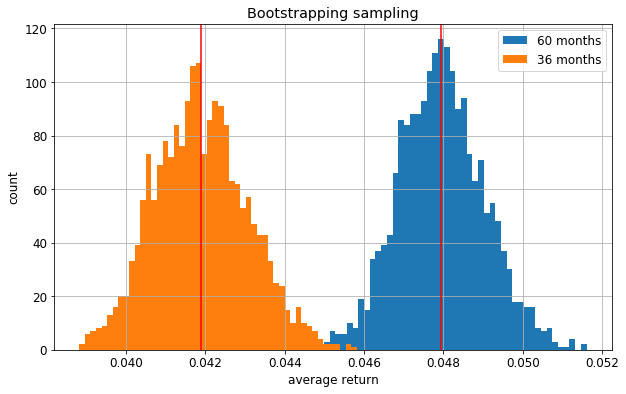

In [78]:
plt.figure(figsize=(10,5))
ax=pd.DataFrame(bs_default_pos_60).hist(bins=50, label='60 months')
pd.DataFrame(bs_default_pos_36).hist(bins=50, ax=ax, label='36 months')
plt.axvline(bs_default_pos_60.mean(), color='r')
plt.axvline(bs_default_pos_36.mean(), color='r')
plt.title('Bootstrapping sampling')
plt.legend()
plt.xlabel('average return')
plt.ylabel('count')
plt.show()

Hypothesis test
- H0: average return for 60 month and 36 month default loan are the same
- H1: average return for 60 month and 46 month default loan are different



In [79]:
# Compute mean of two data
data_concat = np.concatenate([bs_default_pos_36, bs_default_pos_60])
mean_data = np.mean(data_concat)

# Generate shifted arrays
df_default_pos_36s = df_default_pos_36 - np.mean(bs_default_pos_36) + mean_data
df_default_pos_60s = df_default_pos_60 - np.mean(bs_default_pos_60) + mean_data

# compute bootstrap replicates from the shifted arrays
bs_default_pos_36s = Bootstrap_stat(df_default_pos_36s, 10000)
bs_default_pos_60s = Bootstrap_stat(df_default_pos_60s, 10000)

# Get replicates of difference of means
bs_replicates = bs_default_pos_60s - bs_default_pos_36s

# Compute and print p-value: p
p = np.sum(bs_replicates <= (np.mean(df_default_pos_60s)-np.mean(df_default_pos_36s)) ) / 10000
print('p-value =', p)

p-value = 0.49


p > 0.05. We can not reject H0, so the return for 36 month and 60 month loan are the same for the default loan.

## Income vs default 

Compare the default rate of borrowers with income below median income (low income) vs borrowers with income above median income (high income).

In [80]:
# median income for entire population
median_inc = df['annual_inc'].median()
# high income vs low income
inc_above = df[df['annual_inc'] > median_inc]['target']
inc_below = df[df['annual_inc'] <= median_inc]['target']

In [81]:
print('default rate for high income borrower =', round(sum(inc_above)/len(inc_above),2))
print('default rate for low income borrower =', round(sum(inc_below)/len(inc_below),2))

default rate for high income borrower = 0.18
default rate for low income borrower = 0.22


In [82]:
def two_sided_ztest(data1, data2, value):
    ztest ,pval = stests.ztest(x1=data1, x2=data2 , value=value, alternative='two-sided')
    print('p value =', pval)
    if pval<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

Hypothesis test:
- Null Hypothesis: The default rates for low income borrower and high income borrower are the same
- Alternative Hypothesis: The default rate for low income borrower is higher than that of high income borrower

In [83]:
two_sided_ztest(inc_below, inc_above,0)

p value = 0.0
reject null hypothesis


- Null hypothesis is rejected
- **The borrowers with income below median income are more likely to default on a loan.**


## Purpose of loan vs interest rate

In [84]:
df_purpose = df[['purpose','target', 'int_rate']]#.value_counts(normalize=True)

In [85]:
df['purpose'].value_counts()

debt_consolidation    960269
credit_card           370990
home_improvement      109503
other                  98018
major_purchase         35340
medical                19488
small_business         17101
car                    16636
vacation               11565
moving                 11390
house                   9271
wedding                 1342
renewable_energy        1061
educational                2
Name: purpose, dtype: int64

In [87]:
# remove educational 
df_purpose = df_purpose[df_purpose['purpose'] != 'educational']

In [88]:
df_purpose_1 = pd.DataFrame(df_purpose.groupby('purpose')['target'].sum()/df_purpose.groupby('purpose')['target'].count())
df_purpose_1.rename(columns={'target':'default_rate'}, inplace=True)
df_purpose_1=df_purpose_1.sort_values(by='default_rate', ascending=False)

In [89]:
df_purpose_2 =pd.DataFrame(df_purpose.groupby('purpose')['int_rate'].mean())
df_purpose_2.rename(columns={'int_rate':'mean_int_rate'}, inplace=True)
df_purpose_3 =pd.DataFrame(df_purpose.groupby('purpose')['int_rate'].std())
df_purpose_3.rename(columns={'int_rate':'std_int_rate'}, inplace=True)

In [90]:
df_purpose_4 = pd.concat([df_purpose_1, df_purpose_2, df_purpose_3], axis=1, join='inner')
df_purpose_4

,default_rate,mean_int_rate,std_int_rate
purpose,,,
small_business,0.291036,15.927872,5.388915
house,0.229425,15.101172,5.814447
moving,0.227656,15.066790,4.994392
renewable_energy,0.215834,15.377672,5.092227
medical,0.209565,13.911528,4.848425
debt_consolidation,0.208480,13.596403,4.812768
other,0.204024,14.504734,5.104129
major_purchase,0.190549,12.830134,4.989824
vacation,0.183312,13.635814,4.582070


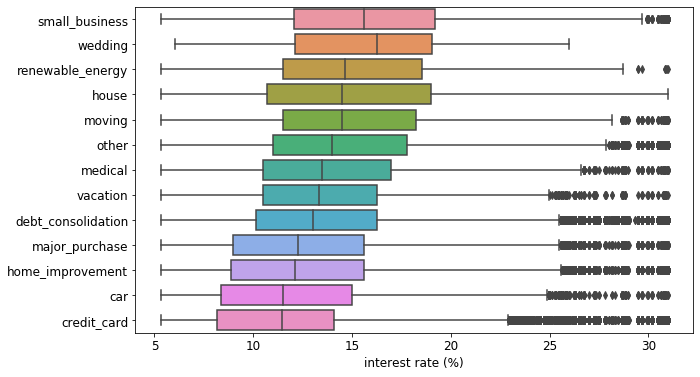

In [91]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 12})
ranks = df_purpose_4['mean_int_rate'].sort_values(ascending=False).index
sns.boxplot(x='int_rate', y='purpose', data=df_purpose, order=ranks)
plt.xlabel('interest rate (%)')
plt.ylabel('')
plt.show()

The data has a very wide spread (large variation). 
perform ANOVA test to see if different purposes have different interest rate.

- Null Hypothesis: Different purposes have the same interest rate.
- Alternative Hypothesis: At least one purpose in the group has different interest rate.

In [92]:
list_purpose = df_purpose['purpose'].unique()
list_purpose

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'major_purchase', 'small_business', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding'], dtype=object)

In [93]:
df_purpose_new = pd.DataFrame()
for i, col in enumerate(list_purpose):
    df_purpose_new[col] = df_purpose[df_purpose['purpose']==str(col)]['int_rate'].reset_index(drop=True)

In [94]:
df_purpose_new.head()

,other,debt_consolidation,home_improvement,credit_card,major_purchase,small_business,house,moving,medical,car,vacation,renewable_energy,wedding
0,14.98,7.62,10.99,13.53,14.98,18.25,13.53,20.50,20.50,7.62,19.22,22.4,25.80
1,16.24,10.99,13.98,7.62,15.61,18.25,23.40,13.53,13.98,15.61,14.98,20.5,11.99
2,19.22,10.99,20.50,17.57,16.24,25.80,22.40,20.50,18.25,11.99,18.25,20.2,19.20
3,13.53,6.62,9.67,9.67,11.99,18.25,20.50,10.99,16.24,14.47,15.61,23.4,12.99
4,19.97,12.85,12.85,10.99,13.53,23.70,24.08,19.22,16.24,14.98,13.53,23.7,20.20


In [95]:
# compute one-way ANOVA P value   
from scipy import stats  

data = [df_purpose_new[col].dropna() for col in df_purpose_new]
      
f_val, p_val = stats.f_oneway(*data)
  
print("One-way ANOVA P =", p_val)  
  
#One-way ANOVA P = 0.381509481874  

One-way ANOVA P = 0.0


p value for ANOVA test is very small, so we can reject null hypothesis.

- different purpose can affect the interest rate. 

## Purpose of loan vs default
- Chi2 test

In [96]:
# make contingency table
con_table = pd.crosstab(df_purpose['target'], df_purpose['purpose'])/len(df_purpose)            
con_table["P(target)"] = con_table.sum(axis=1).rename("P(purpose)")
con_table.append(con_table.sum(axis=0).rename(f"P({df_purpose['purpose'].name})"))                  

purpose,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,P(target)
target,,,,,,,,,,,,,,
0,0.008531,0.185389,0.457331,0.054394,0.004299,0.017212,0.009268,0.005293,0.046944,0.000501,0.007295,0.005683,0.000701,0.80284
1,0.001479,0.037834,0.120457,0.011493,0.001280,0.004052,0.002457,0.001560,0.012033,0.000138,0.002995,0.001276,0.000106,0.19716
P(purpose),0.010010,0.223223,0.577788,0.065887,0.005578,0.021264,0.011726,0.006853,0.058977,0.000638,0.010290,0.006959,0.000807,1.00000


In [97]:
#con_table#.sum(axis=1)
n=len(df_purpose)  
statistic, p_value, _, exp = stats.chi2_contingency(con_table * n)
print('Chi2 statistic =', statistic)
print('p value=', p_value)

Chi2 statistic = 4376.101536166306
p value= 0.0


small p value means we can reject the null hypothesis. 
- It means different purpose affect default.